<h1><font color='dark green'>BBC-text-classification</font></h1>

<a href='https://www.linkedin.com/in/rocky-jagtiani-3b390649/'>Myself </a> , along with some of my students at <a href='https://datascience.suvenconsultants.com' >Suven Data Science programme</a> have made many such notebooks to check and enchance our skills in NLP using Machine Learning.

> This is a simple Data science project on **`multi-class text classification`** to predict the category a news article belongs to. **Our Hypothesis is  : Does the type of Vectorizing Process (Word2Vec  vs. TfidfVectorizer ) influence the precision , accuracy , recall score of the classifiers ? If yes, who wins !!**

> **Tech Stack used** : Python, Scikit-Learn, NLTK, Keras, Pandas, Seaborn, NumPy

> Data : Have used the data aviable in kaggle.com itself : bbc-fulltext-and-category/bbc-text.csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Case 1 : Would use Word2Vec and then apply different classifiers
from gensim.models import Word2Vec  

## Case 2 : Would use TfidfVectorizer and then apply different classifiers
from sklearn.feature_extraction.text import TfidfVectorizer   

## This would help us understand : Does the type of Vectorizing Process influence the precision , accuracy , recall score of the classifiers ??


from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amakr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SHAPE OF DATASET:  (1436, 3) 

COLUMNS IN DATASET:  Index(['ID', 'Text', 'Label'], dtype='object') 

CATEGORIES:  ['POLITICS' 'HEALTH' 'LAW/ORDER' 'RELIGION' 'FARMING'
 'WILDLIFE/ENVIRONMENT' 'SOCIAL ISSUES' 'SOCIAL' 'OPINION/ESSAY'
 'LOCALCHIEFS' 'WITCHCRAFT' 'ECONOMY' 'SPORTS' 'RELATIONSHIPS' 'TRANSPORT'
 'CULTURE' 'EDUCATION' 'MUSIC' 'ARTS AND CRAFTS' 'FLOODING'] 

DATA SAMPLE: 

                ID                                               Text  \
645   ID_YOnNYgBu   A Escom adziwe kuti takwiyaKapito Si zachilen...   
1082  ID_orKJtDSn  Dayosizi ya Dedza Yakhazikisa Komiti Yolimbana...   
1407  ID_yzCFipJC  Akagwira Jere Zaka Zinayi Kaamba Kobaya Mlamu ...   
1193  ID_sOkkMzHm   Chitetezo chachepa, tithandizenianthu Anthu m...   
725   ID_bPjSBeOz   Osinthasintha zipani ngosadalilikaAkadaulo An...   

              Label  
645   OPINION/ESSAY  
1082         HEALTH  
1407      LAW/ORDER  
1193      LAW/ORDER  
725        POLITICS   


NUMBER OF SAMPLES IN EACH CATEGORY: 



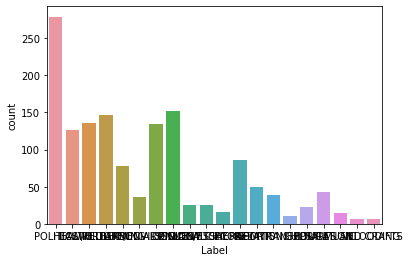

In [3]:
# Read data frame
file_url = '../Translated/cleaned/train.csv'
df = pd.read_csv(file_url)

## Doing basic EDA ( Exploratory Data Analysis )

# Description of the dataset
print('SHAPE OF DATASET: ', df.shape, '\n\nCOLUMNS IN DATASET: ', df.columns, '\n\nCATEGORIES: ', df.Label.unique(), '\n\nDATA SAMPLE: \n\n', df.sample(n=5), '\n\n')

# Plotting number of samples within each category
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.Label)

**Note :** Data set seems balanced.  Just in case if it was highly imbalanced say any one category had more than 50% entries then , we could have used SMOTHE (Synthetic Minority Over-sampling Technique) over the Minor classes and undersampling of Major class.

In [5]:
# DATA CLEANING
print('Data cleaning in progress...')

# Tokenize : dividing Sentences into words
# df['text_clean'] = df['Text'].apply(nltk.word_tokenize)
# print('Tokenization complete.')


# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
other_stop_w = pd.read_csv('words_shared_by_all.csv')
stopw = [item for sublist in other_stop_w.values.tolist() for item in sublist]
stop_words = set(list(stop_words)+stopw)
# df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
# print('Stop words removed.')


# Remove numbers, punctuation and special characters (only keep words)
# regex = '[a-z]+'
# df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
# print('Numbers, punctuation and special characters removed.')


# Lemmatization : lemma means base form of a word.  // Example : leaf and leaves get lemmatized to leaf
# lem = nltk.stem.wordnet.WordNetLemmatizer()
# df['text_clean'] = df['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])
# print('Lemmatization complete.\nData cleaning complete.\n')

Data cleaning in progress...


In [ ]:
# df

> **Note** : None of the classifiers have a accuracy of classification more than 50%. Now thats horrible to say , that our ML model is misclassifying about 60% of the test data. We can't the classifier Algos. They are all popular standard algos. So what we do ????

## **Solution** : Instead of gensim.models.Word2Vec , try to use sklearn.feature_extraction.text.TfidfVectorizer  


In [10]:

# Vectorize training and testing data. Here we would pass TfidfVectorizer() to vec 
def Vectorize(vec, X_train, X_test):    
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    print('Vectorization complete.\n')
    
    return X_train_vec, X_test_vec


# Use multiple classifiers and grid search for prediction
def ML_modeling(models, params, X_train, X_test, y_train, y_test):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
    
        model = models[key]
        param = params[key]
        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
    
    return


## Preparing to make a pipeline 
# models = {
#     'Naive Bayes': MultinomialNB(), 
#     'Decision Tree': DecisionTreeClassifier(),  
#     'Perceptron': MLPClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier()   ## This model would take a little longer to run 
# }

# params = {
#     'Naive Bayes': { 'alpha': [0.5, 1], 'fit_prior': [True, False] }, 
#     'Decision Tree': { 'min_samples_split': [1, 2, 5] }, 
#     'Perceptron': { 'alpha': [0.0001, 0.001], 'activation': ['tanh', 'relu'] },
#     'Gradient Boosting': { 'learning_rate': [0.05, 0.1], 'min_samples_split': [2, 5] }
# }

# Classification using TFIDF vectorizer
models = {
    'Naive Bayes': MultinomialNB(), 
    'SVC': SVC(random_state = 0),
#     'Decision Tree': DecisionTreeClassifier(random_state = 0),  
#     'Perceptron': MLPClassifier(random_state = 0),
#     'Gradient Boosting': GradientBoostingClassifier(random_state = 0),
    'ComplementNB' : ComplementNB(),
    'Logistic Regression' : LogisticRegression(random_state = 0, multi_class = 'ovr', max_iter = 10000)
}

params = {
    'Naive Bayes': { 'alpha': [0.5, 1], 'fit_prior': [True, False] }, 
    'SVC': { 'kernel': ['linear', 'rbf'] },
#     'Decision Tree': { 'min_samples_split': [2, 5] }, 
#     'Perceptron': { 'activation': ['tanh', 'relu'] },
#     'Gradient Boosting': { 'min_samples_split': [2, 5] },
    'ComplementNB' : {},
    'Logistic Regression' : {'C' : [0.001, 0.1 , 7 , 12, 100], 'solver' : ['liblinear'], 'class_weight' : [None, 'Balanced']}

}


## splitting the dataset into 80:20.  have kept shuffle=True , so that the data is randomly sampled or simply said shuffled , and then split.
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, shuffle=True,random_state = 0)


# Encode label categories to numbers
enc = LabelEncoder()
df['Label'] = enc.fit_transform(df['Label'])
labels = list(enc.classes_)
other_stop_w = pd.read_csv('words_shared_by_all.csv')
stopw = [item for sublist in other_stop_w.values.tolist() for item in sublist]

# Train-test split and vectorize
# X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, shuffle=True)
X_train_vec, X_test_vec = Vectorize(TfidfVectorizer(max_features=7000,stop_words=stopw), X_train, X_test)

ML_modeling(models, params, X_train_vec, X_test_vec, y_train, y_test)
## ML_modeling method also prints performance scores for each classifier

Vectorization complete.

Naive Bayes : {'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.559 	Precision: 0.363 	Recall: 0.339 		F1: 0.331

SVC : {'kernel': 'linear'}
Accuracy: 0.597 	Precision: 0.492 	Recall: 0.416 		F1: 0.427

ComplementNB : {}
Accuracy: 0.608 	Precision: 0.489 	Recall: 0.424 		F1: 0.421

Logistic Regression : {'C': 12, 'class_weight': None, 'solver': 'liblinear'}
Accuracy: 0.594 	Precision: 0.489 	Recall: 0.412 		F1: 0.423



<span style="background-color:yellow">Conclusion of this Ananlysis</span> : TfidfVectorizer seems to have performed far better than Word2Vec vectorizer.  So with this simple excerise , its proved that we should prefer to use TfidfVectorizer for most Text (NLP) applications.

In [ ]:
df['text_clean']

## Let's Connect :

You can connect with me on Linkedin here (https://www.linkedin.com/in/rocky-jagtiani-3b390649/) as well see our Data Science Programme here ( https://datascience.suvenconsultants.com/ ). Participate with me in my Live Google Classroom sessions, to solve simple real problems.

<br>

Do read <a href='https://www.linkedin.com/posts/rocky-jagtiani-3b390649_story-traditional-teacher-activity-6675014449620926464-Rsgj'> Rakhee kundu's true story </a>   -->  <b>Rakhee Kundu in below pic , being appreciated by myself ( Prof. Rocky Jagtiani - Data Science Practioner & Trainer )</b>

<br>

![CertificationPic_In_the_NB](https://drive.google.com/uc?id=1lLSFd1O5hrIRBIWztjBiO6RcyPwyDmyF)

